# load packages and dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/ML"
# configurations
data_DIR = '/content/drive/My Drive/Colab Notebooks/1092ML-FinalProject'

Mounted at /content/drive
ls: cannot access '/content/drive/My Drive/ML': No such file or directory


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
from scipy import stats

In [4]:
df_all=pd.read_csv('/content/drive/My Drive/Colab Notebooks/1092ML-FinalProject/df(EDA)-all-0619.csv')

print(df_all.shape)

(581625, 18)


In [7]:
df_all=df_all.drop(columns='Unnamed: 0')
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581625 entries, 0 to 581624
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   HADM_ID         581625 non-null  int64  
 1   TIMER           581625 non-null  object 
 2   INPUT           581625 non-null  float64
 3   INPUT_HRS       581625 non-null  float64
 4   INSULINTYPE     581625 non-null  float64
 5   EVENT           581625 non-null  float64
 6   GLC             581625 non-null  float64
 7   GLCSOURCE       581625 non-null  float64
 8   ADMISSION_TYPE  581625 non-null  int64  
 9   GENDER          581625 non-null  int64  
 10  age_group       581625 non-null  int64  
 11  DM              581625 non-null  int64  
 12  RULE            581625 non-null  float64
 13  Repeated        581625 non-null  float64
 14  LOS_ICU_days    581625 non-null  int64  
 15  days_output     581625 non-null  int64  
 16  C               581625 non-null  int64  
dtypes: float64

In [8]:
df_all.isnull().sum()

HADM_ID           0
TIMER             0
INPUT             0
INPUT_HRS         0
INSULINTYPE       0
EVENT             0
GLC               0
GLCSOURCE         0
ADMISSION_TYPE    0
GENDER            0
age_group         0
DM                0
RULE              0
Repeated          0
LOS_ICU_days      0
days_output       0
C                 0
dtype: int64

### continuous var (INPUT_HRS, GLC)

In [13]:
# statistics
cols=['INPUT', 'INPUT_HRS', 'GLC', 'LOS_ICU_days']
df = df_all[cols]
df.describe(include=[np.number])

,INPUT,INPUT_HRS,GLC,LOS_ICU_days
count,581625.000000,581625.000000,581625.000000,581625.000000
mean,7.976547,3.336404,155.768971,12.236652
std,11.444128,3.271614,62.680439,13.126056
min,0.000833,0.003418,0.133000,0.000000
25%,2.000000,1.001324,116.000000,3.000000
50%,4.000000,2.002329,142.000000,8.000000
75%,8.066712,4.001657,178.000000,17.000000
max,180.000000,29.812108,948.000000,102.000000


Text(0.5, 1.0, 'GLC Normaality')

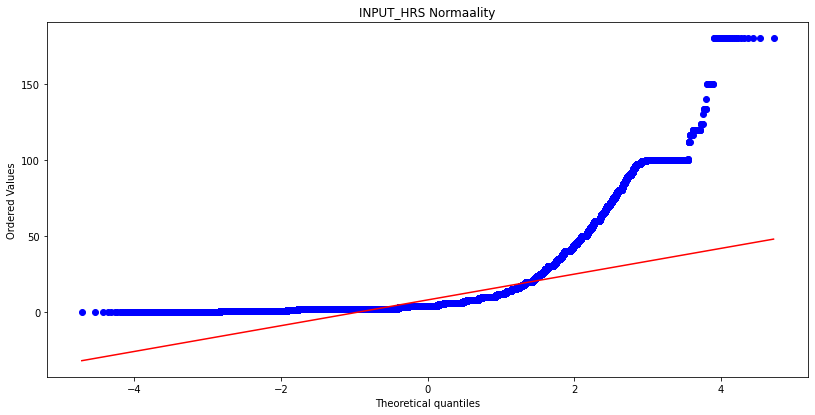

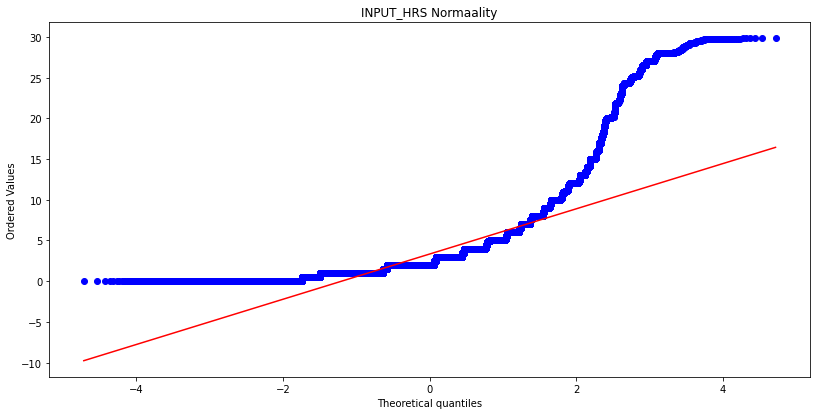

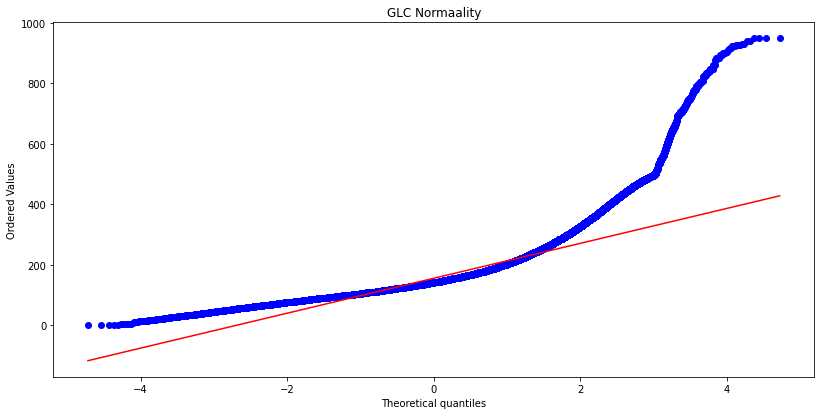

In [10]:
plt.figure(figsize=(30,30))
plt.subplot(4,2,1)
stats.probplot(df['INPUT'], dist="norm", plot= plt)
plt.title("INPUT Normaality")

plt.figure(figsize=(30,30))
plt.subplot(4,2,2)
stats.probplot(df['INPUT_HRS'], dist="norm", plot= plt)
plt.title("INPUT_HRS Normaality")


plt.figure(figsize=(30,30))
plt.subplot(4,2,3)
stats.probplot(df['GLC'], dist="norm", plot= plt)
plt.title("GLC Normaality")

In [29]:
from scipy.stats import median_test
stat, p, med, tbl = median_test(a['INPUT'], b['INPUT'])
print(p, med, a['INPUT'].median(), b['INPUT'].median())

stat, p, med, tbl = median_test(a['INPUT_HRS'], b['INPUT_HRS'])
print(p, med, a['INPUT_HRS'].median(), b['INPUT_HRS'].median())

stat, p, med, tbl = median_test(a['GLC'], b['GLC'])
print(p, med, a['GLC'].median(), b['GLC'].median())

2.1613374178066192e-103 4.0 4.0 4.0
1.8641179514679602e-66 2.0023287 2.02292652 2.00175648
0.4694811978411644 142.0 142.0 142.0


In [14]:
# correlation
df.corr()

,INPUT,INPUT_HRS,GLC,LOS_ICU_days
INPUT,1.000000,0.297160,0.043376,0.029473
INPUT_HRS,0.297160,1.000000,0.125636,-0.063793
GLC,0.043376,0.125636,1.000000,-0.059589
LOS_ICU_days,0.029473,-0.063793,-0.059589,1.000000


([], <a list of 0 Text major ticklabel objects>)

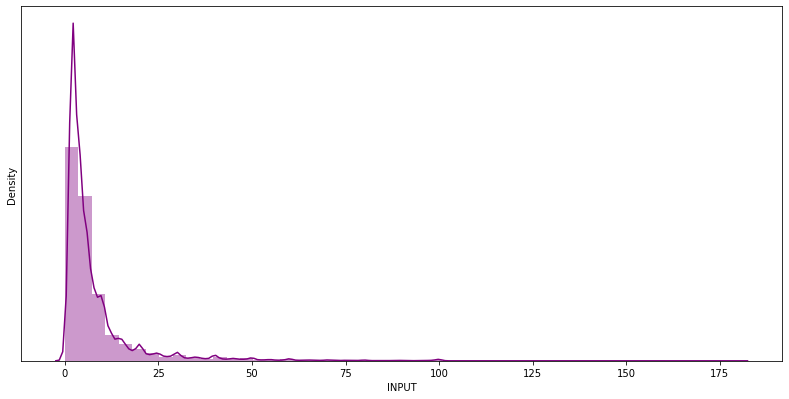

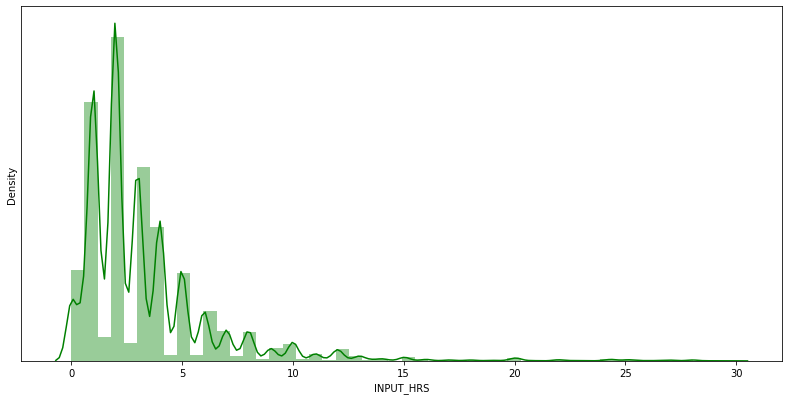

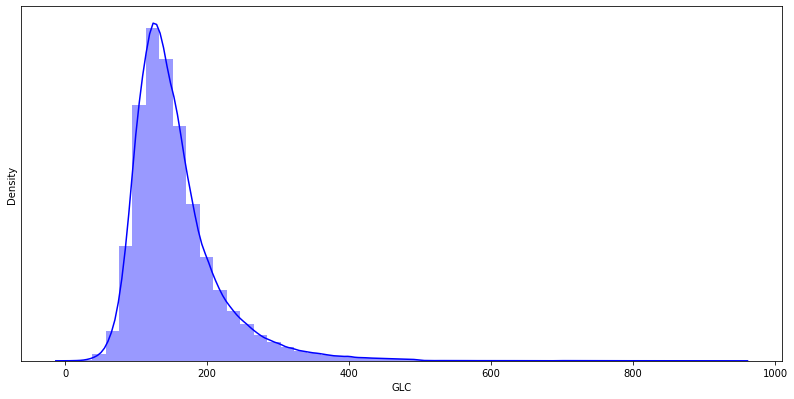

In [19]:
# visualization
plt.figure(figsize=(30,30))
plt.subplot(4,2,1)
sns.distplot(df['INPUT'], color='purple')
plt.yticks([])

plt.figure(figsize=(30,30))
plt.subplot(4,2,2)
sns.distplot(df['INPUT_HRS'], color='green')
plt.yticks([])

plt.figure(figsize=(30,30))
plt.subplot(4,2,3)
sns.distplot(df['GLC'], color='blue')
plt.yticks([])

### categorical var ('INSULINTYPE', 'EVENT', 'GLCSOURCE','ADMISSION_TYPE', 'GENDER', 'DM', 'age_group')

In [34]:
# Chi-square test
from scipy.stats import chi2_contingency

p_=[]
L=['INSULINTYPE', 'EVENT', 'GLCSOURCE','ADMISSION_TYPE', 'GENDER', 'DM', 'age_group']
for i in L:
  contigency= pd.crosstab(df_all[i], df_all['days_output'])
  c, p, dof, expected = chi2_contingency(contigency)
  p_.append(p)

continfency_df = pd.DataFrame(list(zip(L, p_)),
               columns =['var', 'p'])
continfency_df

,var,p
0,INSULINTYPE,1.371173e-108
1,EVENT,0.000000e+00
2,GLCSOURCE,0.000000e+00
3,ADMISSION_TYPE,0.000000e+00
4,GENDER,2.394907e-18
5,DM,5.042365e-254
6,age_group,1.066670e-12
